<a href="https://colab.research.google.com/github/zahid214/Address-book-GUI/blob/main/electronic%20component%20identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from skimage.transform import resize
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (1).zip


In [ ]:
from zipfile import ZipFile
file_name = "/content/dataset.zip"
with ZipFile(file_name, 'r') as zipp:
  zipp.extractall()
  print('Done')

Done


In [ ]:
dataset_path = "/content/dataset"
#desired resolution of image
TARGET_WIDTH = 28
TARGET_HEIGHT = 28
#invert image dark background shows sometime better results
invert = False
#split data
VAL_RATIO = 0.2
TEST_RATIO = 0.2
#random data from seed
random.seed(42)

In [ ]:
labels = []
y_all = []
X_all = []
#find and load Dataset
for label in os.listdir(dataset_path):
  class_dir = os.path.join(dataset_path, label)
  if os.path.isdir(class_dir) and label != "ipynb_checkpoints":
    #add name of folder to our labels list
    labels.append(label)
    #go through each image in the folder
    for i, file in enumerate(os.listdir(class_dir)):
      #sip the jupyter noteook checkpoint folder that get sometime added
      if file != "ipynb_checkpoints":
        #pen image and convert to grayscale
        file_path = os.path.join(class_dir, file)
        img = PIL.Image.open(file_path).convert('L')
        #convert image in numpy
        img_array = np.asarray(img)
        if invert:
          img_array = 255 - img_array
        X_all.append(img_array)
        #add label to y array
        y_all.append(label)
    #show how much images we loaded
    print('added', str(i+1),'images from', label)
#calculate total no of samples
num_sample = len(X_all)
#sort the label by alphabatical order
labels = sorted(labels) 
#print labels and no of samples
print(labels)
print('number of samples =',num_sample)

added 50 images from background
added 50 images from capacitor
added 50 images from diode
added 50 images from led
added 50 images from resistor
['background', 'capacitor', 'diode', 'led', 'resistor']
number of samples = 250


In [ ]:
#convert label to numbers
print("before", y_all)
#convert each label to its index
y_out = []
for i, label in enumerate(y_all):
  y_out.append(labels.index(label))
y_all = y_out
print("after", y_all)

before ['background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capacitor', 'capac

In [ ]:
#shuffle data
X_y = list(zip(X_all, y_all))
random.shuffle(X_y)
X_all,y_all = zip(*X_y)

In [ ]:
#number of train, test and validation samples
num_test_samp = int(TEST_RATIO * num_sample)
num_val_samp = int(VAL_RATIO * num_sample)
#first test set
X_test = X_all[:num_test_samp]
y_test = y_all[:num_test_samp]
#second validation set
X_val = X_all[num_test_samp:(num_test_samp+num_val_samp)]
y_val = y_all[num_test_samp:(num_test_samp+num_val_samp)]
#training set
X_train = X_all[(num_test_samp + num_val_samp):]
y_train = y_all[(num_test_samp + num_val_samp):]
#remember train sample
num_train_samp = len(X_train)
print("number of test samples = ", num_test_samp)
print("number of validation samples = ", num_val_samp)
print("number of train samples = ", num_train_samp)

number of test samples =  50
number of validation samples =  50
number of train samples =  150


Label:3(led)
[[161 161 164 ... 166 166 166]
 [161 161 164 ... 166 166 166]
 [161 161 164 ... 169 169 169]
 ...
 [122 122 122 ... 141 141 141]
 [121 121 121 ... 141 141 141]
 [122 122 122 ... 141 141 141]]


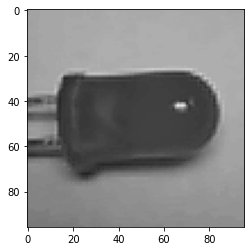

In [ ]:
#view training images after resizing
idx = 55
print("Label:" + str(y_train[idx]) + "(" + labels[y_train[idx]] + ")")
print(X_train[idx])
plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=255)

In [ ]:
#function to resize images
def resize_images(images, width, height, anti_aliasing=True):
  X_out = []
  for i, img in enumerate(images):
    X_out.append(resize(img, (width,height), anti_aliasing=anti_aliasing))
  return X_out

In [ ]:
#resize all images
X_train = resize_images(X_train, TARGET_WIDTH, TARGET_HEIGHT)
X_val = resize_images(X_val, TARGET_WIDTH, TARGET_HEIGHT)
X_test = resize_images(X_test, TARGET_WIDTH, TARGET_HEIGHT)

Label:3(led)


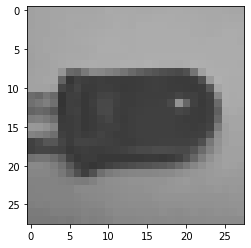

In [ ]:
#view training images after resizing
idx = 55
print("Label:" + str(y_train[idx]) + "(" + labels[y_train[idx]] + ")")
#print(X_train[idx])
plt.imshow(X_train[idx], cmap='gray', vmin=0, vmax=1)

In [ ]:
#test set
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
#validation set
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
#training set
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
#display

print("test x samples = ", X_test)
print("test y samples = ", y_test)
print("train x samples = ", X_train)
print("train y samples = ", y_train)
print("validation x samples = ", X_val)
print("validation y samples = ", y_val)

test x samples =  [[[0.55378151 0.55294118 0.55294118 ... 0.57254902 0.57254902 0.57254902]
  [0.55294118 0.55294118 0.55546218 ... 0.57647059 0.57254902 0.57254902]
  [0.56134454 0.56470588 0.56862745 ... 0.57254902 0.57254902 0.57232893]
  ...
  [0.56862745 0.56862745 0.56862745 ... 0.57647059 0.57647059 0.57647059]
  [0.56862745 0.56862745 0.56862745 ... 0.58169268 0.58571429 0.58823529]
  [0.56862745 0.56862745 0.56862745 ... 0.58403361 0.58769508 0.57815126]]

 [[0.61176471 0.61176471 0.61568627 ... 0.61960784 0.62436975 0.62436975]
  [0.61428571 0.61428571 0.61568627 ... 0.62605042 0.63137255 0.63137255]
  [0.61568627 0.61876751 0.62406963 ... 0.63137255 0.63137255 0.63137255]
  ...
  [0.41344538 0.46152461 0.49133653 ... 0.64313725 0.64313725 0.64313725]
  [0.51314526 0.52016807 0.52997199 ... 0.64173669 0.64313725 0.6397559 ]
  [0.51764706 0.51818727 0.52997199 ... 0.63613445 0.63613445 0.63613445]]

 [[0.63529412 0.64313725 0.64705882 ... 0.68627451 0.68487395 0.68543417]
  [0

In [ ]:
#Flatten to 1D array (DNN required 1D array)
len_vect = TARGET_WIDTH * TARGET_WIDTH
#resize all images
X_train = X_train.reshape(num_train_samp, len_vect)
X_val = X_val.reshape(num_val_samp, len_vect)
X_test = X_test.reshape(num_test_samp, len_vect)
input_shape = (X_train.shape[1])
print("x train",X_train.shape)
print("y train",y_train.shape)
print("x test",X_test.shape)
print("y test",y_test.shape)
print("x val",X_val.shape)
print("y val",y_val.shape)
print("input_tensor_shape ", input_shape)

In [ ]:
#one hot encoding
#get no of classes 
num_classes = len(labels)
#use keras to create one hot encoding
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes) 
#print out shape
print("Y train", Y_train.shape)
print("Y test", Y_test.shape)
print("Y val", Y_val.shape)
#print out few example
for i in range(10):
  print("label:" + str(y_train[i]) + "| one-hot", Y_train[i])

Y train (150, 5)
Y test (50, 5)
Y val (50, 5)
label:2| one-hot [0. 0. 1. 0. 0.]
label:2| one-hot [0. 0. 1. 0. 0.]
label:4| one-hot [0. 0. 0. 0. 1.]
label:4| one-hot [0. 0. 0. 0. 1.]
label:4| one-hot [0. 0. 0. 0. 1.]
label:0| one-hot [1. 0. 0. 0. 0.]
label:2| one-hot [0. 0. 1. 0. 0.]
label:3| one-hot [0. 0. 0. 1. 0.]
label:2| one-hot [0. 0. 1. 0. 0.]
label:0| one-hot [1. 0. 0. 0. 0.]


In [ ]:
#sequential model
model = Sequential()
#first layer fully connected with relu activation
model.add(Dense(64), input_shape=input_shape)
model.add(Activation('relu'))
model.add(Dropout(0.25))
#second layer fully connected with relu activation
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
#third layer : 5 nodes connected with softmax activation
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#configure model for trainning
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
input_shape=(1,28,28)
model.build(input_shape)
print(model.summary())

TypeError: ignored

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1, validation_data=(X_val, y_val))

Epoch 1/200


ValueError: ignored